In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request as urlr
import json
sns.set(color_codes=True);

#Tabulation

In [ ]:
url ='https://api.covid19india.org/states_daily.json'

In [ ]:
urlr.urlretrieve(url,'covid_data.json')

('covid_data.json', <http.client.HTTPMessage at 0x7f10ec8d4828>)

In [ ]:
df=pd.read_json('covid_data.json')

In [ ]:
with open('covid_data.json') as f:
    data=json.load(f)

In [ ]:
data = data['states_daily']

In [ ]:
dfcovid = pd.json_normalize(data)

In [ ]:
covid_conf=dfcovid[dfcovid.status == 'Confirmed'].drop('status',axis=1)

In [ ]:
covid_conf.date = pd.to_datetime(covid_conf.date)

In [ ]:
covid_conf.set_index('date',inplace=True)

In [ ]:
covid_conf=covid_conf.apply(pd.to_numeric)

# Styling

In [ ]:
df = covid_conf.tail(10)

In [ ]:
df

In [ ]:
def negative_red(x):
    #return 'color: red' if x<0 else ''
    color = 'red' if x<0 else 'white'
    return 'color: ' + color

In [ ]:
negative_red(-3)

'color: red'

In [ ]:
df.style.applymap(negative_red)

In [ ]:
df.drop('un',axis=1,inplace=True)

In [ ]:
df.style.background_gradient(subset=['dl','mh','tn'],cmap='Greens')

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-11 00:00:00,0,1813,6,535,709,13,65,1781,14,117,872,11,648,145,268,2798,488,13,8139,76,11,544,1,16,570,230,65,574,26,1178,3965,31,27757,1392,44,1344
2020-07-12 00:00:00,7,1933,19,735,1266,10,184,1573,16,85,879,31,658,97,357,2627,435,9,7827,33,16,431,4,26,595,234,81,644,4,1269,4244,105,29106,1384,120,1560
2020-07-13 00:00:00,3,1935,27,1001,1116,29,184,1246,25,130,902,30,689,203,314,2738,449,7,6497,21,17,575,2,71,616,357,50,544,2,1550,4328,26,28178,1654,71,1435
2020-07-14 00:00:00,5,1916,75,859,1432,12,114,1606,16,170,915,66,699,262,346,2496,608,35,6741,2,46,798,5,51,543,333,63,635,45,1524,4526,90,29917,1594,78,1390
2020-07-15 00:00:00,5,2432,29,1088,1320,19,177,1647,17,198,925,32,678,337,493,3176,623,14,7975,19,28,638,0,6,618,288,65,866,11,1597,4496,98,32607,1659,99,1589
2020-07-16 00:00:00,4,2593,52,892,1385,16,198,1652,18,157,919,36,696,221,490,4169,722,5,8641,40,64,735,34,14,494,295,147,737,13,1676,4549,98,35468,2058,197,1690
2020-07-17 00:00:00,0,2602,66,1218,1742,25,249,1462,32,196,949,40,795,313,601,3693,791,4,8308,26,36,704,10,40,718,348,89,615,32,1478,4538,118,34820,1722,120,1894
2020-07-18 00:00:00,4,3963,41,1117,1667,31,243,1475,45,180,960,40,750,289,441,4537,593,8,8348,15,91,681,2,22,591,350,58,711,19,1284,4807,171,37411,1873,174,2198
2020-07-19 00:00:00,15,5041,90,1018,1412,26,161,1211,37,173,965,64,617,167,701,4120,821,19,9518,32,20,837,0,10,736,308,109,934,10,1296,4979,223,40235,2211,239,2278


In [ ]:
df.drop(['dd' , 'ld'], axis=1,inplace=True)

In [ ]:
def max_bold(x):
    max_check = (x==x.max())
    max_check[max_check==True] = 'font-weight: bold'
    max_check[max_check==False] = ''
    return max_check

In [ ]:
max_bold(df['dl'])

date
2020-07-11    font-weight: bold
2020-07-12                     
2020-07-13                     
2020-07-14                     
2020-07-15                     
2020-07-16                     
2020-07-17                     
2020-07-18                     
2020-07-19                     
2020-07-20                     
Name: dl, dtype: object

In [ ]:
df.style.highlight_max(color='red').highlight_min(color='green').apply(max_bold)

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-11 00:00:00,0,1813,6,535,709,13,65,1781,14,117,872,11,648,145,268,2798,488,13,8139,76,11,544,1,16,570,230,65,574,26,1178,3965,31,27757,1392,44,1344
2020-07-12 00:00:00,7,1933,19,735,1266,10,184,1573,16,85,879,31,658,97,357,2627,435,9,7827,33,16,431,4,26,595,234,81,644,4,1269,4244,105,29106,1384,120,1560
2020-07-13 00:00:00,3,1935,27,1001,1116,29,184,1246,25,130,902,30,689,203,314,2738,449,7,6497,21,17,575,2,71,616,357,50,544,2,1550,4328,26,28178,1654,71,1435
2020-07-14 00:00:00,5,1916,75,859,1432,12,114,1606,16,170,915,66,699,262,346,2496,608,35,6741,2,46,798,5,51,543,333,63,635,45,1524,4526,90,29917,1594,78,1390
2020-07-15 00:00:00,5,2432,29,1088,1320,19,177,1647,17,198,925,32,678,337,493,3176,623,14,7975,19,28,638,0,6,618,288,65,866,11,1597,4496,98,32607,1659,99,1589
2020-07-16 00:00:00,4,2593,52,892,1385,16,198,1652,18,157,919,36,696,221,490,4169,722,5,8641,40,64,735,34,14,494,295,147,737,13,1676,4549,98,35468,2058,197,1690
2020-07-17 00:00:00,0,2602,66,1218,1742,25,249,1462,32,196,949,40,795,313,601,3693,791,4,8308,26,36,704,10,40,718,348,89,615,32,1478,4538,118,34820,1722,120,1894
2020-07-18 00:00:00,4,3963,41,1117,1667,31,243,1475,45,180,960,40,750,289,441,4537,593,8,8348,15,91,681,2,22,591,350,58,711,19,1284,4807,171,37411,1873,174,2198
2020-07-19 00:00:00,15,5041,90,1018,1412,26,161,1211,37,173,965,64,617,167,701,4120,821,19,9518,32,20,837,0,10,736,308,109,934,10,1296,4979,223,40235,2211,239,2278


In [ ]:
df[['dl','mh','tn']].style.bar(subset = ['dl'],color='blue').bar(subset = ['mh'],color='red').bar(subset = ['tn'],color='green')

,dl,mh,tn
date,,,
2020-07-11 00:00:00,1781,8139,3965
2020-07-12 00:00:00,1573,7827,4244
2020-07-13 00:00:00,1246,6497,4328
2020-07-14 00:00:00,1606,6741,4526
2020-07-15 00:00:00,1647,7975,4496
2020-07-16 00:00:00,1652,8641,4549
2020-07-17 00:00:00,1462,8308,4538
2020-07-18 00:00:00,1475,8348,4807
2020-07-19 00:00:00,1211,9518,4979


In [ ]:
df.drop('tt',axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.style.background_gradient(axis=1,cmap = 'ho')

ValueError: ignored

In [ ]:
df.style.background_gradient(axis=1,cmap = 'YlGnBu_r')

#  Data Distribution

In [ ]:
sns.set(color_codes=True)

## Single Variable

### Histogram (distplot)

In [ ]:
x = np.random.normal(size=10000)

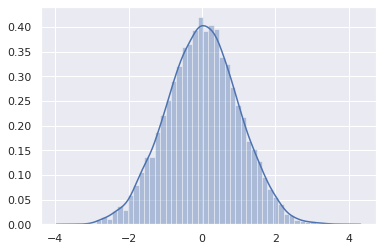

In [ ]:
sns.distplot(x)

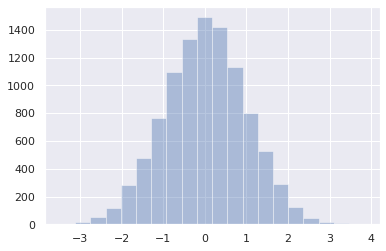

In [ ]:
sns.distplot(x,kde=False,bins=20)

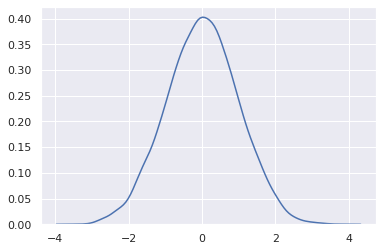

In [ ]:
sns.kdeplot(x)

In [ ]:
y=np.random.uniform(size=10000)

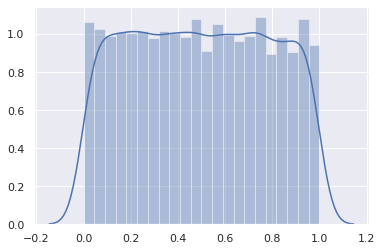

In [ ]:
sns.distplot(y)

In [ ]:
z = np.random.random(size=10000)

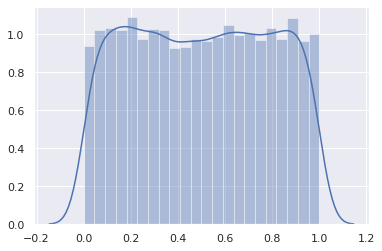

In [ ]:
sns.distplot(z)

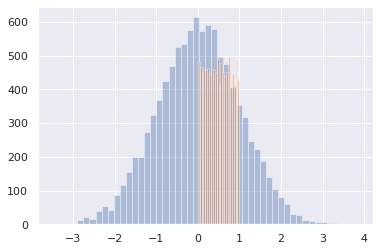

In [ ]:
sns.distplot(x,kde=False)
sns.distplot(y,kde=False)

In [ ]:
diamond = sns.load_dataset('diamonds')

In [ ]:
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


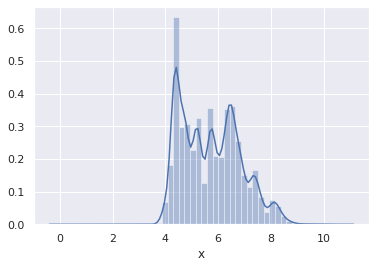

In [ ]:
sns.distplot(diamond.x)

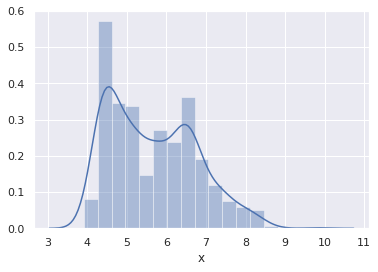

In [ ]:
sns.distplot(diamond.sample(1000).x)

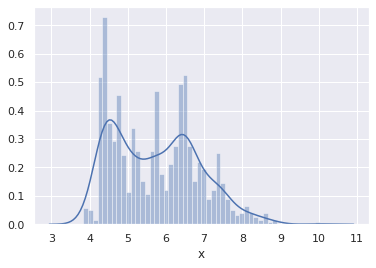

In [ ]:
sns.distplot(diamond.sample(1000).x, bins=50)

### Kde plot

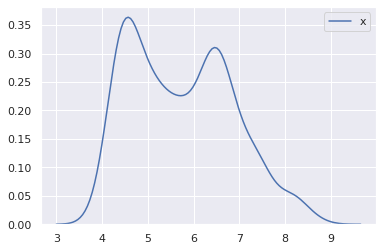

In [ ]:
sns.kdeplot(diamond.sample(1000).x)

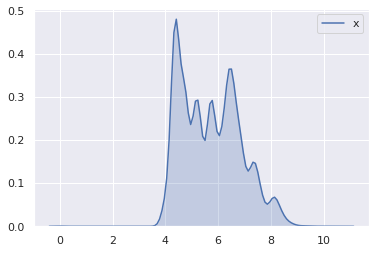

In [ ]:
sns.kdeplot(diamond.x,shade=True)

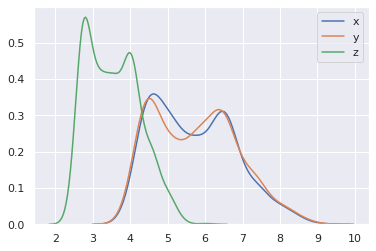

In [ ]:
sns.kdeplot(diamond.sample(1000).x)
sns.kdeplot(diamond.sample(1000).y)
sns.kdeplot(diamond.sample(1000).z)

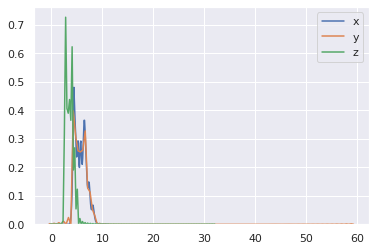

In [ ]:
sns.kdeplot(diamond.x)
sns.kdeplot(diamond.y)
sns.kdeplot(diamond.z)

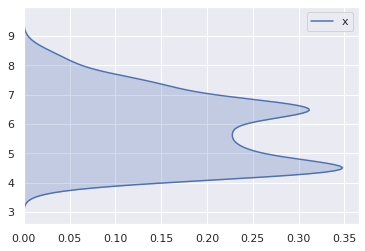

In [ ]:
sns.kdeplot(diamond.sample(1000).x, shade=True , vertical=True)

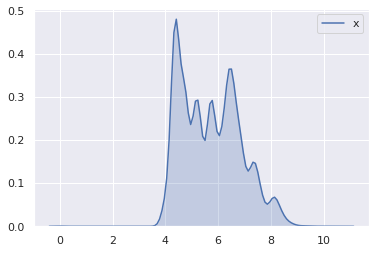

In [ ]:
sns.kdeplot(diamond.x, shade=True )

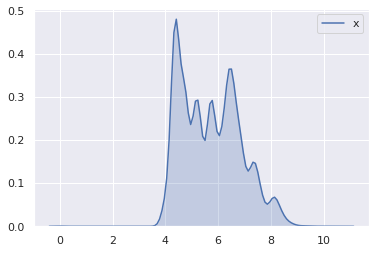

In [ ]:
sns.kdeplot(diamond.x, shade=True , )

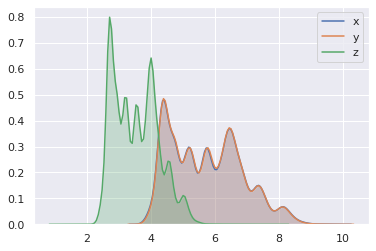

In [ ]:
sns.kdeplot(diamond.x,shade=True,clip=(1,10))
sns.kdeplot(diamond.y,shade=True,clip=(1,10))
sns.kdeplot(diamond.z,shade=True,clip=(1,10))

### Box Plot

In [ ]:
x = np.random.normal(size = 10000)

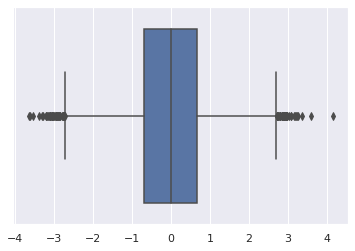

In [ ]:
sns.boxplot(x);

In [ ]:
y = np.random.uniform(size = 10000)

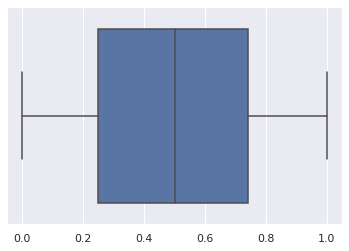

In [ ]:
sns.boxplot(y)

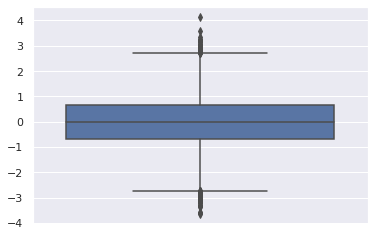

In [ ]:
sns.boxplot(x, orient='v')

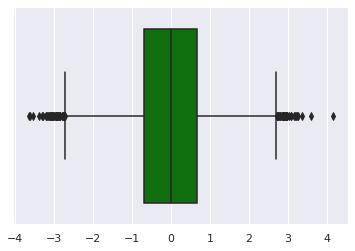

In [ ]:
sns.boxplot(x, color='Green')

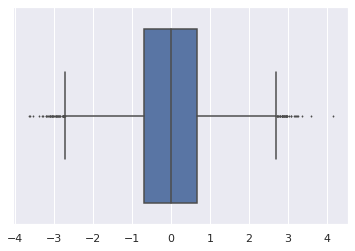

In [ ]:
sns.boxplot(x, fliersize = 1)

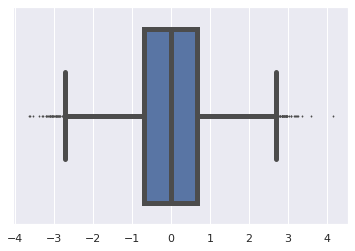

In [ ]:
sns.boxplot(x, fliersize = 1, linewidth=5)

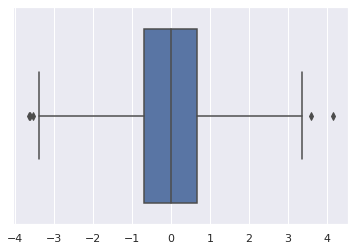

In [ ]:
sns.boxplot(x,whis=2)

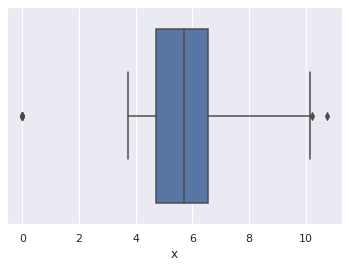

In [ ]:
sns.boxplot(diamond.x, whis=2)

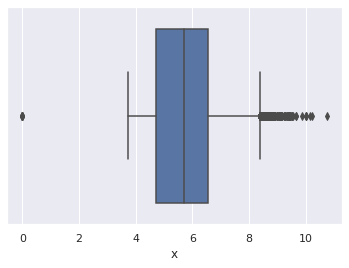

In [ ]:
sns.boxplot(diamond.x, whis=1, )

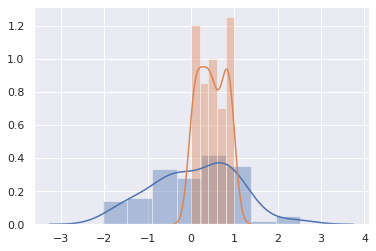

In [ ]:
sns.distplot(x[:100])
sns.distplot(y[:100])

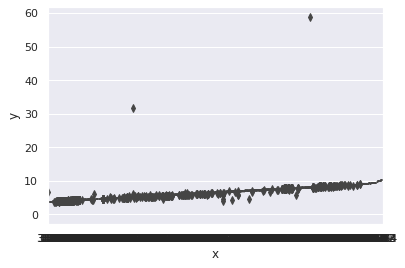

In [ ]:
sns.boxplot(x='x',y='y',data=diamond)

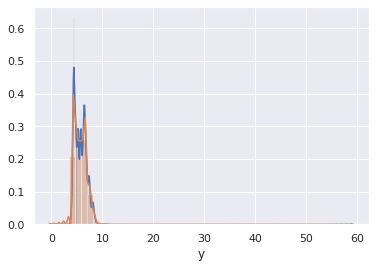

In [ ]:
sns.distplot(diamond.x)
sns.distplot(diamond.y)

## Distribution of Categorical Data

In [3]:
penguin = sns.load_dataset('penguins')

### Bar Plots

In [ ]:
cut = diamond.groupby('cut')['cut'].count()

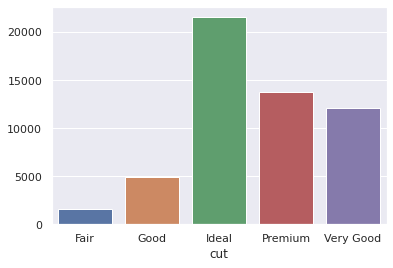

In [ ]:
sns.barplot(x=cut.index, y=cut.values)

In [ ]:
color = diamond.groupby('color')['color'].count()

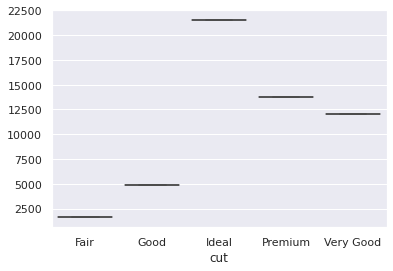

In [ ]:
sns.boxplot(x=cut.index, y=cut.values)

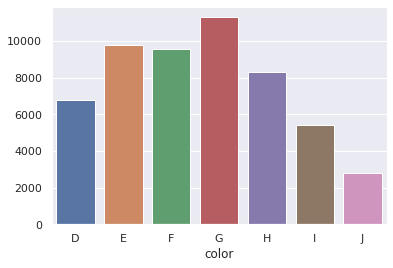

In [ ]:
sns.barplot(x=color.index, y=color.values)

In [ ]:
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
clarity = diamond.groupby('clarity')['clarity'].count()

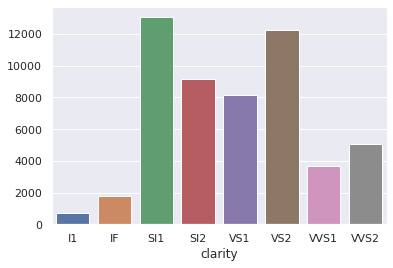

In [ ]:
sns.barplot(x=clarity.index, y=clarity.values, capsize=5)

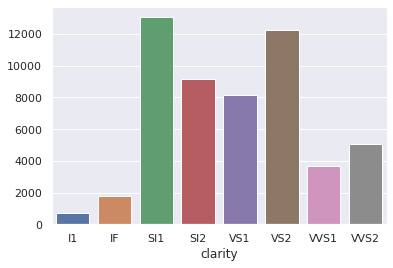

In [ ]:
sns.barplot(x=clarity.index, y=clarity.values, capsize=20, )

###Joint Plots

In [ ]:
x = np.random.normal(size=10000)
y = np.random.normal(size=10000)

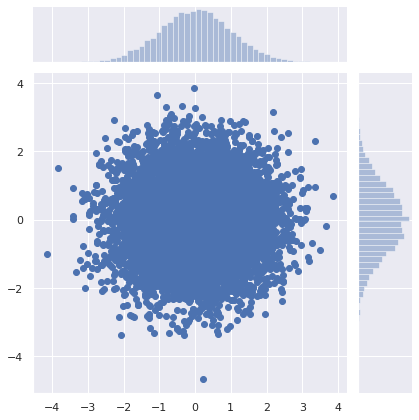

In [ ]:
sns.jointplot(x,y)

In [ ]:
y = 3 * x

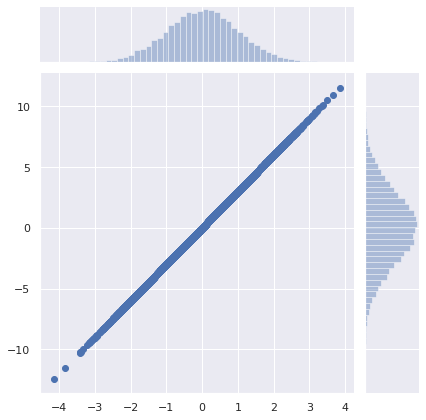

In [ ]:
sns.jointplot(x,y)

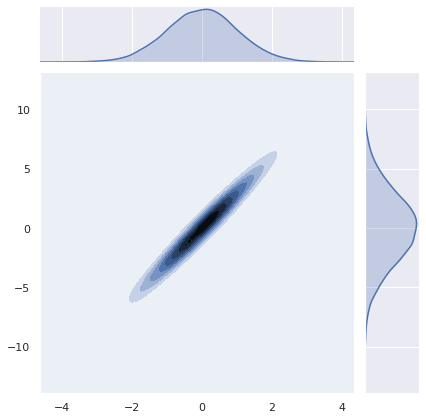

In [ ]:
sns.jointplot(x,y,kind='kde')

In [ ]:
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


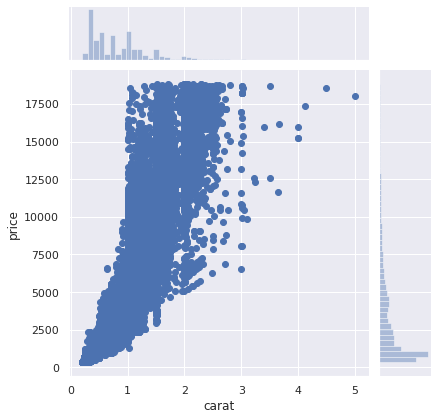

In [ ]:
sns.jointplot('carat','price',data=diamond)

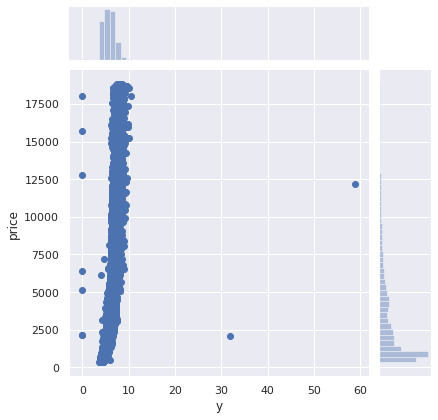

In [ ]:
sns.jointplot('y','price',data=diamond)

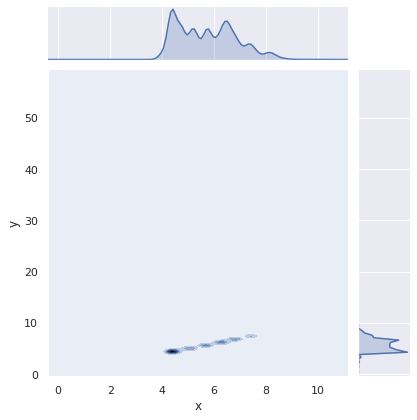

In [ ]:
sns.jointplot('x','y',data=diamond, kind = 'kde',)

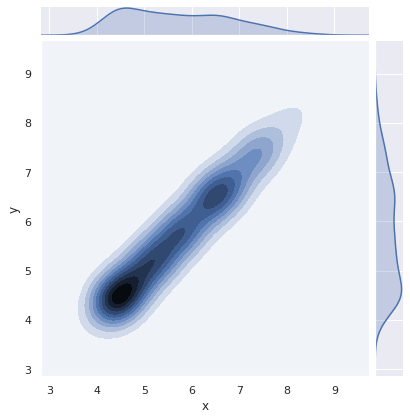

In [ ]:
sns.jointplot('x','y',data=diamond.sample(500), kind = 'kde', ratio=10, )

###Swarm Plot

In [ ]:
sample = diamond.sample(500)

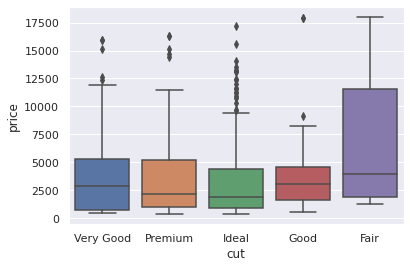

In [ ]:
sns.boxplot(x='cut', y='price',data=sample, )

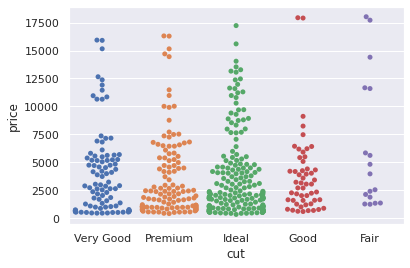

In [ ]:
sns.swarmplot(x='cut', y='price',data=sample)

In [ ]:
penguin = sns.load_dataset('penguins')

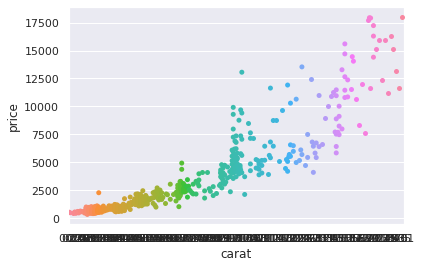

In [ ]:
sns.swarmplot(x='carat',y='price',data=sample)

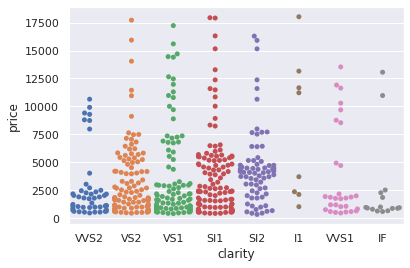

In [ ]:
sns.swarmplot(x='clarity', y='price',data=sample)

In [ ]:
penguin.groupby('species')['body_mass_g'].mean()

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

In [ ]:
penguin

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


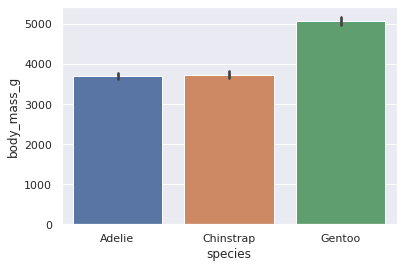

In [ ]:
sns.barplot(x='species',y='body_mass_g',data=penguin)

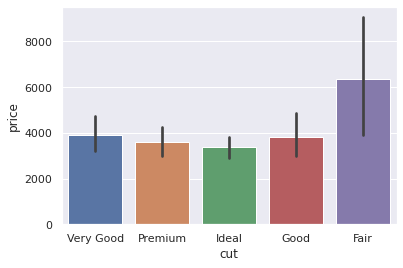

In [ ]:
sns.barplot(x='cut',y='price',data=sample)

In [ ]:
sample.groupby('cut')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
cut,,,,,,,,
Fair,17.0,6348.000000,5935.851761,1257.0,1892.00,3972.0,11600.0,18018.0
Good,52.0,3807.326923,3555.569300,606.0,1603.75,3060.5,4582.5,17930.0
Ideal,213.0,3361.469484,3543.710010,348.0,877.00,1882.0,4380.0,17227.0
Premium,121.0,3583.892562,3605.094931,421.0,1002.00,2185.0,5250.0,16304.0
Very Good,97.0,3916.762887,3763.174025,463.0,758.00,2871.0,5257.0,15931.0


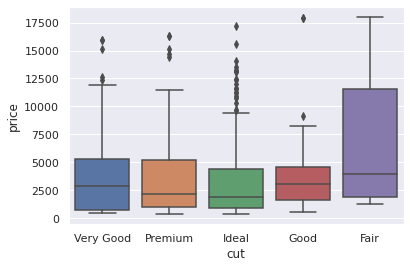

In [ ]:
sns.boxplot(x='cut',y='price',data=sample)

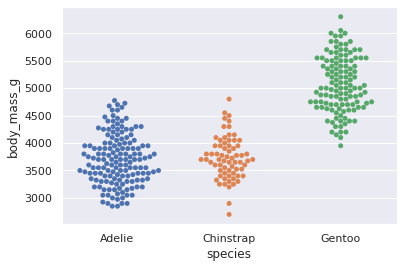

In [ ]:
sns.swarmplot(x='species',y='body_mass_g', data=penguin, )

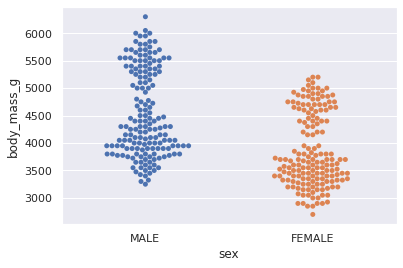

In [ ]:
sns.swarmplot(x='sex',y='body_mass_g',data=penguin)

### Violin Plot

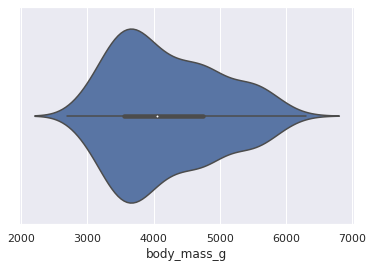

In [ ]:
sns.violinplot(penguin.body_mass_g)

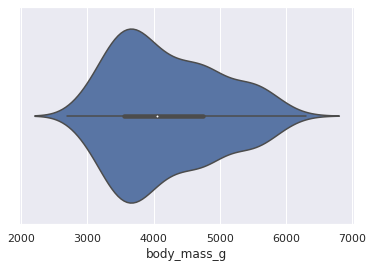

In [ ]:
sns.violinplot(x='body_mass_g',data = penguin)

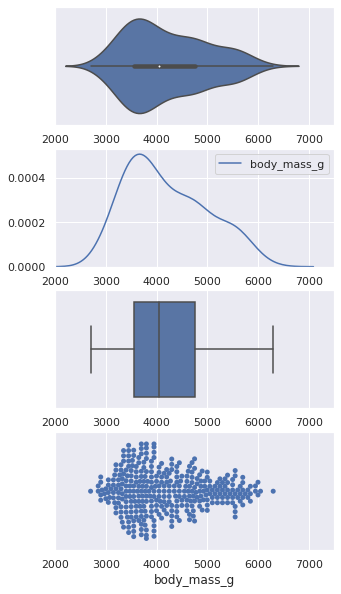

In [ ]:
fig,axs = plt.subplots(nrows=4)
fig.set_size_inches(w=5,h=10)
sns.violinplot(penguin.body_mass_g,ax = axs[0]).set(xlim=(2000,7500))
sns.kdeplot(penguin.body_mass_g,ax = axs[1]).set(xlim=(2000,7500))
sns.boxplot(penguin.body_mass_g,ax = axs[2]).set(xlim=(2000,7500))
sns.swarmplot(penguin.body_mass_g,ax = axs[3]).set(xlim=(2000,7500));

In [ ]:
penguin

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


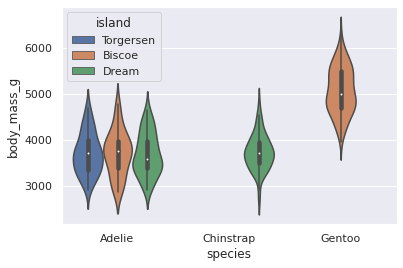

In [ ]:
sns.violinplot(y='body_mass_g', x='species', hue='island', data=penguin)

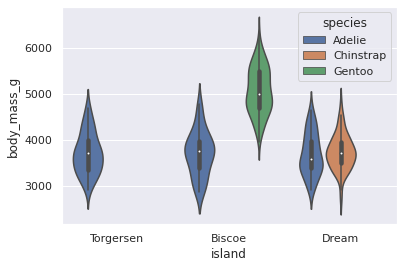

In [ ]:
sns.violinplot(y='body_mass_g', x='island', hue='species', data=penguin)

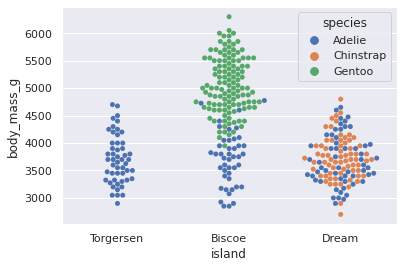

In [ ]:
sns.swarmplot(y='body_mass_g', x='island', hue='species', data=penguin)

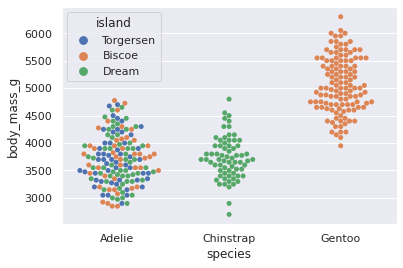

In [ ]:
sns.swarmplot(y='body_mass_g', x='species', hue='island', data=penguin)

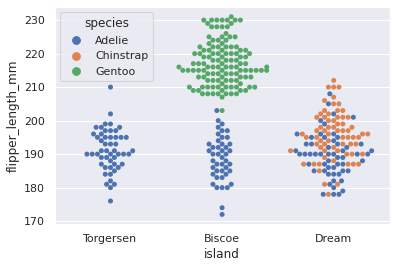

In [ ]:
sns.swarmplot(y='flipper_length_mm', x='island', hue='species', data=penguin)

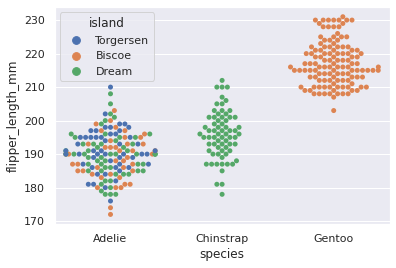

In [ ]:
sns.swarmplot(y='flipper_length_mm', x='species', hue='island', data=penguin)

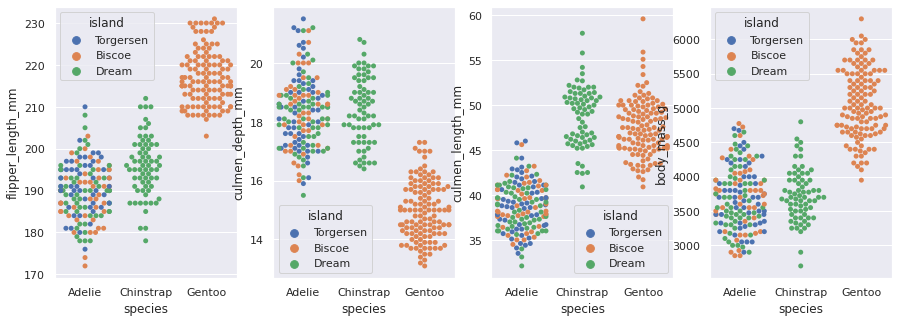

In [ ]:
fig,axs = plt.subplots(ncols=4)
fig.set_size_inches(w=15,h=5)
sns.swarmplot(y='flipper_length_mm', x='species',data=penguin,ax=axs[0], hue='island')
sns.swarmplot(y='culmen_depth_mm', x='species',data=penguin,ax=axs[1],hue='island')
sns.swarmplot(y='culmen_length_mm', x='species',data=penguin,ax=axs[2],hue='island')
sns.swarmplot(y='body_mass_g', x='species',data=penguin,ax=axs[3],hue='island')

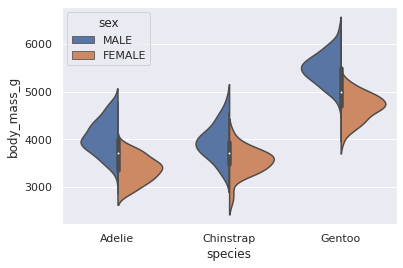

In [ ]:
sns.violinplot(y='body_mass_g', x='species',data=penguin, hue='sex',split=True)

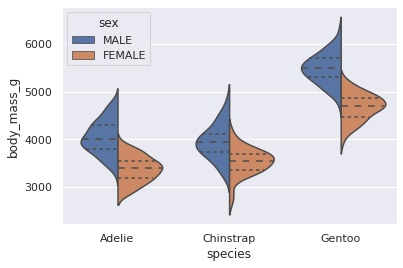

In [ ]:
sns.violinplot(y='body_mass_g', x='species',data=penguin, hue='sex',split=True, inner='quartile')

In [ ]:
penguin['binary_species'] = penguin.species.apply(lambda x: 1 if x=='Gentoo' else 0)

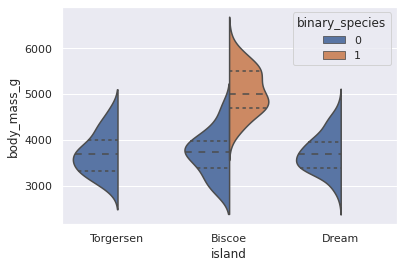

In [ ]:
sns.violinplot(y='body_mass_g', x='island',data=penguin, hue='binary_species',split=True, inner='quartile')

###Feceted Plotting

species
Adelie       AxesSubplot(0.125,0.125;0.775x0.755)
Chinstrap    AxesSubplot(0.125,0.125;0.775x0.755)
Gentoo       AxesSubplot(0.125,0.125;0.775x0.755)
Name: flipper_length_mm, dtype: object

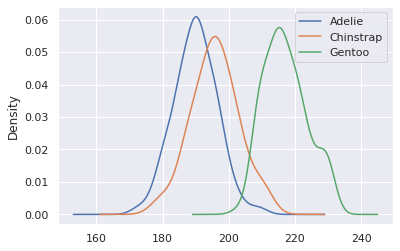

In [10]:
penguin.groupby('species')['flipper_length_mm'].plot(legend=True,kind='kde')

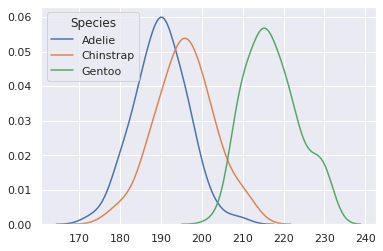

In [12]:
sns.kdeplot(penguin[penguin['species']=='Adelie'].flipper_length_mm)
sns.kdeplot(penguin[penguin['species']=='Chinstrap'].flipper_length_mm)
sns.kdeplot(penguin[penguin['species']=='Gentoo'].flipper_length_mm)
plt.legend(title='Species',labels=penguin.species.unique())

[(150.0, 250.0)]

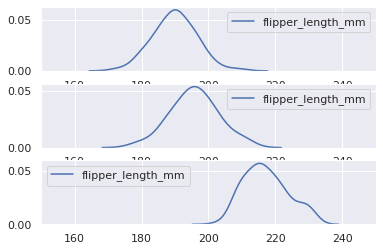

In [14]:
fig, axs = plt.subplots(nrows=3)
sns.kdeplot(penguin[penguin['species']=='Adelie'].flipper_length_mm,ax=axs[0]).set(xlim=(150,250))
sns.kdeplot(penguin[penguin['species']=='Chinstrap'].flipper_length_mm,ax=axs[1]).set(xlim=(150,250))
sns.kdeplot(penguin[penguin['species']=='Gentoo'].flipper_length_mm,ax=axs[2]).set(xlim=(150,250))

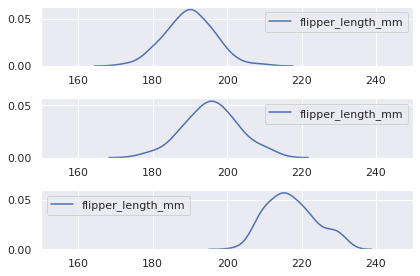

In [15]:
fig, axs = plt.subplots(nrows=3)
sns.kdeplot(penguin[penguin['species']=='Adelie'].flipper_length_mm,ax=axs[0]).set(xlim=(150,250))
sns.kdeplot(penguin[penguin['species']=='Chinstrap'].flipper_length_mm,ax=axs[1]).set(xlim=(150,250))
sns.kdeplot(penguin[penguin['species']=='Gentoo'].flipper_length_mm,ax=axs[2]).set(xlim=(150,250))
plt.tight_layout()

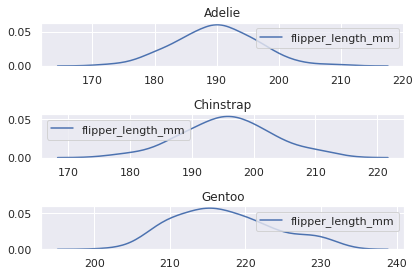

In [20]:
fig, axs = plt.subplots(nrows=3)
sns.kdeplot(penguin[penguin['species']=='Adelie'].flipper_length_mm,ax=axs[0],clip=(150,250),).set_title('Adelie')
sns.kdeplot(penguin[penguin['species']=='Chinstrap'].flipper_length_mm,ax=axs[1],clip=(150,250)).set_title('Chinstrap')
sns.kdeplot(penguin[penguin['species']=='Gentoo'].flipper_length_mm,ax=axs[2],clip=(150,250)).set_title('Gentoo')
plt.tight_layout()

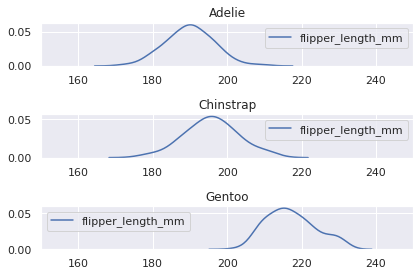

In [27]:
col = 'species'
fig, axs = plt.subplots(nrows = len(penguin[col].unique()))

i=0
for specie in penguin[col].unique():
    p1 = sns.kdeplot(penguin[penguin[col]==specie].flipper_length_mm,ax=axs[i])
    p1.set(xlim=(150,250))
    p1.set_title(specie)
    i+=1
plt.tight_layout()

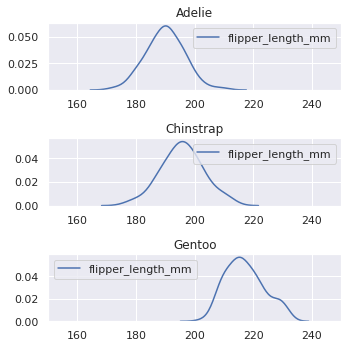

In [30]:
col = 'species'
fig, axs = plt.subplots(nrows = len(penguin[col].unique()))
fig.set_size_inches(w=5,h=5)
i=0
for specie in penguin[col].unique():
    p1 = sns.kdeplot(penguin[penguin[col]==specie].flipper_length_mm,ax=axs[i])
    p1.set(xlim=(150,250))
    p1.set_title(specie)
    i+=1
plt.tight_layout()

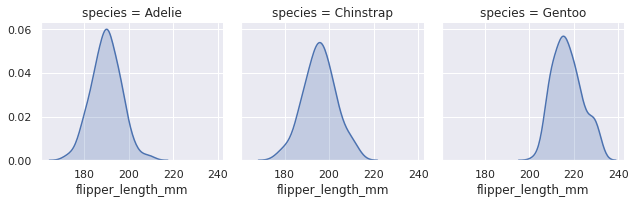

In [40]:
g = sns.FacetGrid(penguin,col='species')
g.map(sns.kdeplot,'flipper_length_mm',shade=True)

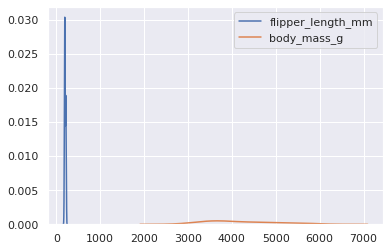

In [42]:
sns.kdeplot(penguin.flipper_length_mm)
sns.kdeplot(penguin.body_mass_g)

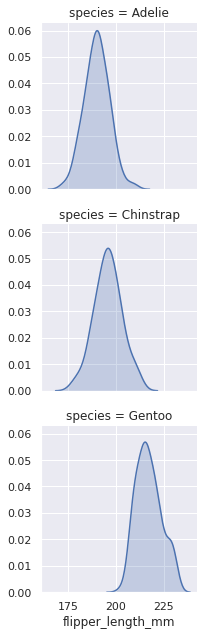

In [43]:
g = sns.FacetGrid(penguin,row='species')
g.map(sns.kdeplot,'flipper_length_mm',shade=True)

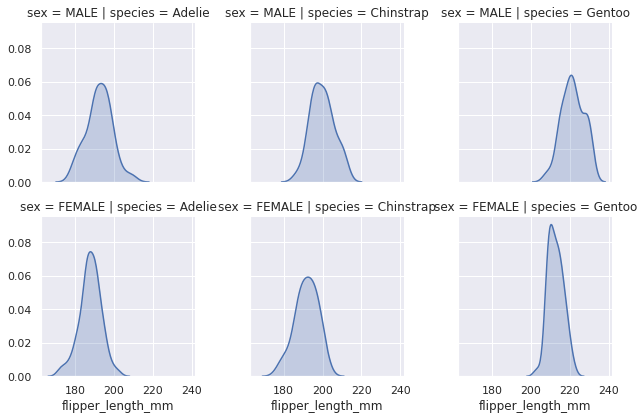

In [44]:
g = sns.FacetGrid(penguin,col='species',row='sex')
g.map(sns.kdeplot,'flipper_length_mm',shade=True)